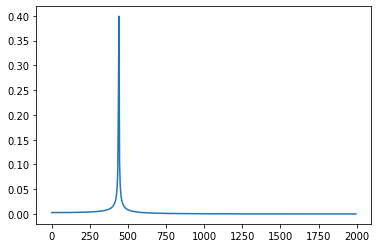

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def dft(samples):
  N = len(samples)
  output = [0] * N

  for k in range(0, N - 1):
    freq = 2 * np.pi * k / N
    real = 0
    imag = 0

    for t in range(0, N - 1):
      real += np.cos(freq * t) * samples[t]
      imag -= np.sin(freq * t) * samples[t]
      
    output[k] = np.sqrt(real ** 2 + imag ** 2) / N

  return output

Fs = 4000
dt = 1 / Fs

f0 = 440
N = 1024

t = np.linspace(0, (N - 1) * dt, N)

df = Fs / N
f = np.linspace(0, (N - 1) * df, N)

y = 256 * np.sin(2 * np.pi * f0 * t)

X = dft(y)

plt.plot(f[0:int(N/2)], X[0:int(N/2)])